# Structural Biology for Lead Discovery - Practical Class 1: jupyter notebook good practices and RdKit


## Synopsis

In this notebook we will explore the usage of rdkit, and we will complement it with a brief overview of what is expected from you when you deliver the different course assignments.

## Jupyter notebook good practices

We will use Jupyter Notebooks to learn the practical aspects of drug discovery. But more importantly, we will use Jupyter notebooks for some of the deliverables. Because last year the quality of the Jupyter notebooks was generally poor, we will first learn how to make the deliverables good looking enough to get the maximal qualification.


**Remember! We have to evaluate 25 notebooks in every assignment. Making our job easy improves your grades**

### Dependencies

Dependencies should be always loaded at the very beginning. Otherwise, it might happen that the analysis cannot be completed due to some missing dependency. In the case of Google Colab, we will always install the apps before doing anything.

In [1]:
# numpy, matplotlib, pandas, ... are usually already available in Google Colab. 
#!pip install rdkit
#!pip install xlsxwriter

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rdkit.Chem as chem
from typing import List
from io import StringIO
import pandas as pd
from rdkit.Chem import Descriptors as chemdesc
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem as achem
PandasTools.InstallPandasTools()

# PandasTools.RenderImagesInAllDataFrames(images=True)


### This is a story

**Jupyter notebooks** are meant to **narrate** an analysis. If we wanted to simply run code, we will simply write Python / R scripts (.py/.R), and we will avoid this format. Therefore, between every block of code **we must always provide an explanation**. 
- If we between two blocks of code there are no explanations, then that means that these two blocks could go all together. 
- If we don't have anything to say, then we might have to wonder what are we doing. 
Below, an example of what is expected from you.

---

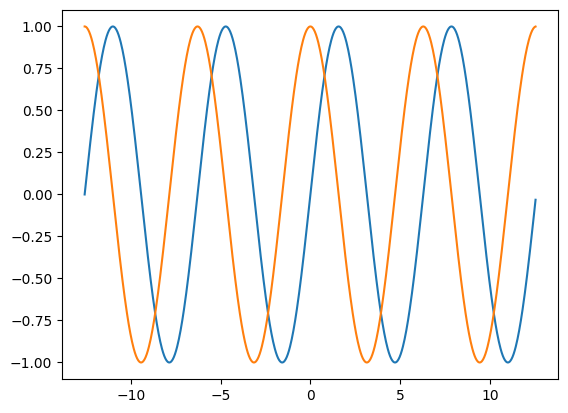

In [3]:
# Example 1
x = np.arange(-4*np.pi, 4*np.pi, np.pi/100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, label='sin')
plt.plot(x, y2, label='cos')



As we can appreciate in this plot, the sine function and the cosine function change across the values of x producing oscillations with different phase.

---

### Always run everything before saving

It is sometimes tempting to run Cell 6, then Cell 9, then Cell 7, etc. Jupyter Notebooks allow us to do so... and it is terrible! If you obtained your results after running a set of non-linear instructions, we won't have the time or patience to check it or to understand it. Therefore, always run everything from scratch before saving. Sometimes, it is better for you to give a clean notebook (without outputs) than an inconsistent notebook.

### Make code clear

This does not apply to Jupyter Notebooks, but for everything you ever do. Good and clear code is easy to read, so bugs can be found easily. Complicated and obfuscated code is hard to debug. Therefore, code quality is not aimed to annoy you, but it is part of the result. Some examples below:

In [4]:
# bad code
x = [1, 12, 13] # what the hell is x?
a = [1, 13, 13] # what the hell is a?
def foo(x, a): # what the hell is doing foo?
    return x[0], a[0]

c = foo(x, a) # ??
aa = 6 # why?
aA = 8.5 # using upper case and lower cases to distinguish variables
# is the recipe for disaster

Now some good code

In [5]:
activity_drug_X: List[float] = [1, 12, 13]
activity_drug_A: List[float] = [1, 12, 13]

def get_first_item(x: List[float], y: List[float]) -> (float, float):
    """
    This function returns the first item simultaneously for both x and y

    Example
    ---

    >>> a = [1, 2, 3]
    >>> b = [4, 5, 6]
    >>> get_first_item(a, b)
    1, 4
    """

    return (x[0], y[0])

activity_0 = get_first_item(activity_drug_X, activity_drug_A) # We will use these values to calibrate the baseline

lower_detection_threshold = 6.0
upper_detection_threshold = 8.5 


### Output

Jupyter Notebooks can sometimes lead us too far away from the data values. Some clues:

- Save data regularly into CSV or excel format, so you can take a look at the data
- If you are working in VSCode, install DataWrapper immediately.

## RdKit

### Loading and saving molecules in rdkit

RdKit enables us to work with many different chemical formats and chemoinformatic
algorithms in Python. First of all, let's explore how rdkit enables us to open
and save molecules.

#### From SMILES

Loading a molecule from SMILES is as easy as simply using the `chem.MolFromSmiles` method, and providing a SMILES string.

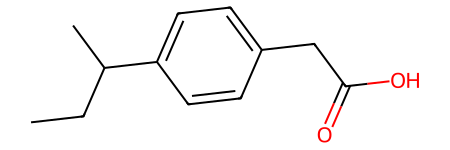

In [6]:
good_molecule = chem.MolFromSmiles("c1cc(C(C)CC)ccc1CC(O)=O") # Easy
good_molecule

The mol object is displayed as an image in Jupyter Notebooks, but it is a `rdkit.Chem.rdchem.Mol` object.

(By the way, rdkit is written in C++, so it can be a bit hard to understand its errors, structure, or documentation)

In [7]:
type(good_molecule)

rdkit.Chem.rdchem.Mol

Let's take a look at the documentation.

In [8]:
?good_molecule

Type:           Mol
String form:    <rdkit.Chem.rdchem.Mol object at 0x116d19cb0>
File:           ~/projects/sbld25/.venv/lib/python3.12/site-packages/rdkit/Chem/rdchem.so
Docstring:     
The Molecule class.

In addition to the expected Atoms and Bonds, molecules contain:
  - a collection of Atom and Bond bookmarks indexed with integers
      that can be used to flag and retrieve particular Atoms or Bonds
      using the {get|set}{Atom|Bond}Bookmark() methods.

  - a set of string-valued properties. These can have arbitrary string
      labels and can be set and retrieved using the {set|get}Prop() methods
      Molecular properties can be tagged as being *computed*, in which case
        they will be automatically cleared under certain circumstances (when the
        molecule itself is modified, for example).
      Molecules also have the concept of *private* properties, which are tagged
        by beginning the property name with an underscore (_).
Init docstring:
__init__( (object)se

Depending on whether we provide a reasonable SMILES string or not, we might get a valid molecule object or None. For instance, the following operation should return us a void `m`

In [9]:
bad_molecule = chem.MolFromSmiles("c1cc(C(=C)=CC)ccc1CC(O)=O") # Issues!
bad_molecule

[17:51:33] Explicit valence for atom # 3 C, 5, is greater than permitted


We can use the `sanitize=False` argument to obtain a result (though assuming the risks!)

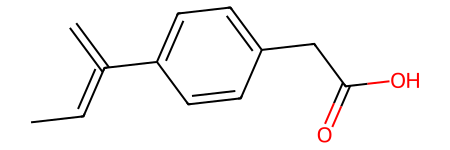

In [10]:
bad_molecule = chem.MolFromSmiles("c1cc(C(=C)=CC)ccc1CC(O)=O", sanitize=False) # Issues!
bad_molecule

If we just put anything, we will not get an error, but a `None`

In [11]:
bad_molecule = chem.MolFromSmiles("asdasdasdaO") # Issues!
assert(bad_molecule is None) # assert allows us to check that a statement is true
bad_molecule

[17:51:33] SMILES Parse Error: syntax error while parsing: asdasdasdaO
[17:51:33] SMILES Parse Error: check for mistakes around position 1:
[17:51:33] asdasdasdaO
[17:51:33] ^
[17:51:33] SMILES Parse Error: Failed parsing SMILES 'asdasdasdaO' for input: 'asdasdasdaO'


#### From SMILES to other formats

Once we have declared a molecule in SMILES, we can convert it to other formats very easily. For instance, let's obtain the `InChiKeys`.

In [12]:
chem.MolToInchiKey(good_molecule) # InChIKey

'GGIRQPMCEAWMBX-UHFFFAOYSA-N'

and `InChI`s

In [13]:
chem.MolToInchi(good_molecule) # inchi

[17:51:33] WARNING: Omitted undefined stereo



'InChI=1S/C12H16O2/c1-3-9(2)11-6-4-10(5-7-11)8-12(13)14/h4-7,9H,3,8H2,1-2H3,(H,13,14)'

and `mol` format. 

One quick note here: we can use `GetProp` and `SetProp` to store information within molecules. It is sometimes useful.

In [14]:
good_molecule.SetProp("_Name", "Compound-V")
print(chem.MolToMolBlock(good_molecule))

Compound-V
     RDKit          2D

 14 14  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000   -5.1962    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    3.8971    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1

#### From SMILES to file 

We can save molecules using different options. First, let's consider that we had a collection of many molecules. We can use `SDWriter` to write multiple molecules into an SDF or `.smi` file.

In [15]:
sio = StringIO() # We can replace this by a filename 
smiles_writer = chem.SDWriter(sio) 
smiles_writer.write(good_molecule)
smiles_writer.write(chem.MolFromSmiles("Cc1ccccc1"))
smiles_writer.close()
print(sio.getvalue())

Compound-V
     RDKit          2D

 14 14  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000   -5.1962    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    3.8971    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1

We can also save to SMILES

In [16]:
sio = StringIO() # We can replace this by a filename 
smiles_writer = chem.SmilesWriter(sio) 
smiles_writer.write(good_molecule)
smiles_writer.write(chem.MolFromSmiles("Cc1ccccc1"))
smiles_writer.close()
print(sio.getvalue())

SMILES Name 
CCC(C)c1ccc(CC(=O)O)cc1 Compound-V
Cc1ccccc1 1



#### Molecules to Pandas

Anyway, in this course, we will also use a more data-science centric approach: using `pandas` dataframes.

My favourite way to declare a dataframe is simply to use the `from_records` function. 

In [17]:
molecule_records = [ # We declare rows as dictionaries
    {'molecule_name': 'compound V', 'smiles': 'c1cc(C(C)CC)ccc1CC(O)=O'}, # each dictionary has the same items
    {'molecule_name': 'compound V-Met', 'smiles': 'c1cc(C(C)CC)ccc1C(C)C(O)=O'},
]
molecule_records

[{'molecule_name': 'compound V', 'smiles': 'c1cc(C(C)CC)ccc1CC(O)=O'},
 {'molecule_name': 'compound V-Met', 'smiles': 'c1cc(C(C)CC)ccc1C(C)C(O)=O'}]

Now we convert everything to a `dataframe`

In [18]:
molecules_df = pd.DataFrame.from_records(molecule_records)
molecules_df

,molecule_name,smiles
0,compound V,c1cc(C(C)CC)ccc1CC(O)=O
1,compound V-Met,c1cc(C(C)CC)ccc1C(C)C(O)=O


We can declare new columns with arbitrary fields. For instance, we can create `chem.Mol` instances.

In [19]:
molecules_df['mol'] = molecules_df['smiles'].apply(lambda x: chem.MolFromSmiles(x))
molecules_df

,molecule_name,smiles,mol
0,compound V,c1cc(C(C)CC)ccc1CC(O)=O,<rdkit.Chem.rdchem.Mol object at 0x116d1a2d0>
1,compound V-Met,c1cc(C(C)CC)ccc1C(C)C(O)=O,<rdkit.Chem.rdchem.Mol object at 0x116d1adc0>


**Important: Remember to remove all the exoteric fields before saving**. Otherwise you will get this

In [20]:
sio = StringIO() # We can replace this by a filename 
molecules_df.to_csv(sio)
print(sio.getvalue())

,molecule_name,smiles,mol
0,compound V,c1cc(C(C)CC)ccc1CC(O)=O,<rdkit.Chem.rdchem.Mol object at 0x116d1a2d0>
1,compound V-Met,c1cc(C(C)CC)ccc1C(C)C(O)=O,<rdkit.Chem.rdchem.Mol object at 0x116d1adc0>



In [21]:
sio = StringIO() # We can replace this by a filename 
molecules_df.drop(columns=['mol']).to_csv(sio)
print(sio.getvalue())

,molecule_name,smiles
0,compound V,c1cc(C(C)CC)ccc1CC(O)=O
1,compound V-Met,c1cc(C(C)CC)ccc1C(C)C(O)=O



Depicting using dataframes can be quite easy

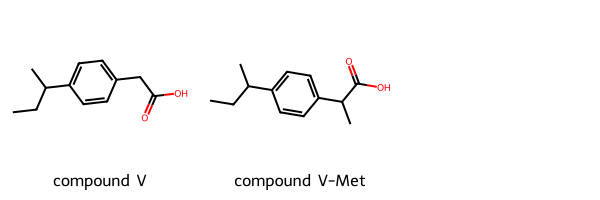

In [22]:
chem.PandasTools.FrameToGridImage(molecules_df, 'mol', legendsCol='molecule_name')

In [23]:
PandasTools.SaveXlsxFromFrame(molecules_df, 'molecules_excel.xlsx', molCol='mol')

### Computing molecular properties

rdkit has a `rdChemDescriptors` library that can help us computing a few molecular properties, among them molecular weight


[rdkit rdChemDescriptors documentation](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html)

In [24]:
chemdesc.ExactMolWt(good_molecule)

192.115029752

We can remove the hydrogens to compute the MW too

In [25]:
chemdesc.HeavyAtomMolWt(good_molecule)

176.12999999999997

Total polar surface area

In [26]:
chemdesc.TPSA(good_molecule)

37.3

LogP

In [27]:
chemdesc.MolLogP(good_molecule)

2.8272000000000004

All descriptors together:

In [28]:
chemdesc.CalcMolDescriptors(good_molecule)

{'MaxAbsEStateIndex': np.float64(10.443681500377929),
 'MaxEStateIndex': np.float64(10.443681500377929),
 'MinAbsEStateIndex': np.float64(0.11189082577475418),
 'MinEStateIndex': np.float64(-0.776583338582346),
 'qed': 0.796029047684387,
 'SPS': 12.428571428571429,
 'MolWt': 192.25799999999995,
 'HeavyAtomMolWt': 176.12999999999997,
 'ExactMolWt': 192.115029752,
 'NumValenceElectrons': 76,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': 0.30731476176231204,
 'MinPartialCharge': -0.48098617331603855,
 'MaxAbsPartialCharge': 0.48098617331603855,
 'MinAbsPartialCharge': 0.30731476176231204,
 'FpDensityMorgan1': 1.3571428571428572,
 'FpDensityMorgan2': 1.9285714285714286,
 'FpDensityMorgan3': 2.357142857142857,
 'BCUT2D_MWHI': 16.365158452693702,
 'BCUT2D_MWLOW': 9.970256517001744,
 'BCUT2D_CHGHI': 2.034700133568974,
 'BCUT2D_CHGLO': -2.0834259361216967,
 'BCUT2D_LOGPHI': 2.1827310557126873,
 'BCUT2D_LOGPLOW': -1.9991639463159099,
 'BCUT2D_MRHI': 5.696457417947056,
 'BCUT2D_MRLOW': -0.1357

We can do so at scale on our dataframe using `apply`

In [29]:
molecules_df['mol_wt'] = molecules_df['mol'].apply(lambda x: chemdesc.ExactMolWt(x))
molecules_df

,molecule_name,smiles,mol,mol_wt
0,compound V,c1cc(C(C)CC)ccc1CC(O)=O,<rdkit.Chem.rdchem.Mol object at 0x116d1a2d0>,192.11503
1,compound V-Met,c1cc(C(C)CC)ccc1C(C)C(O)=O,<rdkit.Chem.rdchem.Mol object at 0x116d1adc0>,206.13068


**Exercise**: How can we create a dataframe that has ALL molecular descriptors?


*hint*: the molecular descriptor is a dictionary.

### Converting 2D molecules into 3D molecules

**Important**: Do you know the difference between accessing a variable by value or by reference?

To generate 3D coordinates, rdkit provides some very useful and easy algorithms. First, we need to add hydrogen atoms, which we do with the function `chem.AddHs`

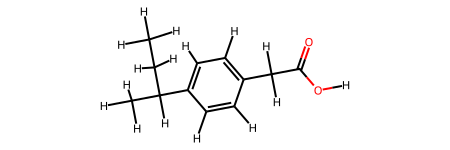

In [30]:
good_molecule_H = chem.AddHs(good_molecule)
good_molecule_H

Then, we apply the `achem.EmbedMolecule`. 

**Notice that this is not a Chem function but an AllChem function**

In [31]:
achem.EmbedMolecule(good_molecule_H)

0

**Question**: Why didn't we include an output there?

In [32]:
achem.MMFFOptimizeMolecule(good_molecule_H)

0

In [33]:
chem.MolToMolFile(good_molecule_H, "good_molecule_optimized.mol")
chem.MolToMolFile(good_molecule, "good_molecule_notoptimized.mol")

## Substructure searches

RdKit makes very easy and simple substructure searches. We first need to declare a given pattern, and then look for it using `HasSubstructMatch`

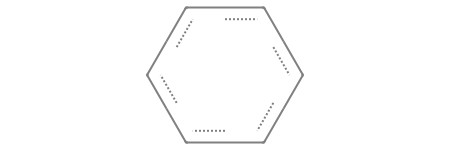

In [34]:
aromatic_ring = chem.MolFromSmarts('c1ccccc1')
aromatic_ring

Easy!

In [35]:
good_molecule.HasSubstructMatch(aromatic_ring)

True

Let's try with something strange

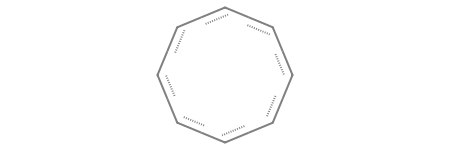

In [36]:
strange_ring = chem.MolFromSmarts('c1ccccccc1')
strange_ring

In [37]:
good_molecule.HasSubstructMatch(strange_ring)

False

We can do substructure searches out of SMILES too

In [38]:
aromatic_ring = chem.MolFromSmiles('c1ccccc1')
good_molecule.HasSubstructMatch(aromatic_ring)

True

# Exercise

Perform the following analysis in the blocks below:


*You are in charge of a computational campaign, and the people from the chemical synthesis department has sent you a set of molecules. The guys from lead-development want you to detect all the molecules that have two different and separated aromatic rings and a carboxyl group, and they want you to compute how many of those compounds would satisfy the Lipinski rule of five. Keep in mind that they don't know how to open a jupyter-notebook or anything alike*.


Hints:
- SMARTS: You can find the documentation here [https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html)
- SmilesMolSupplier is a generator: that means that you need to iterate it to get stuff. Use a for loop. 
- Pandas is your friend. 